In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/SPE Calgary and GCS - Geothermal/NLe

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/SPE Calgary and GCS - Geothermal/NLe


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', 199)
pd.options.mode.chained_assignment = None
pd.io.formats.excel.ExcelFormatter.header_style = None
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.dpi'] = 110
matplotlib.rcParams['lines.markersize'] = 1
matplotlib.rcParams["axes.grid"] = True
# matplotlib.rcParams['axes.xmargin'] = 0
# matplotlib.rcParams['axes.ymargin'] = 0
matplotlib.rcParams['figure.autolayout'] = False

In [ ]:
import missingno as msno
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

## Duvernay

UWI  DST Start Depth (MD) (m)  DST End Depth (MD) (m)  \
0    100010107020W500                    1410.6                  1423.4   
1    100010608109W500                    1686.0                  1694.0   
2    100011206021W400                     822.0                   825.0   
3    100011506915W500                    1801.0                  1818.0   
4    100011804403W500                    2007.0                  2018.0   
..                ...                       ...                     ...   
494  102101106218W500                    3105.9                  3113.8   
495  102101403324W400                    2403.0                  2417.0   
496  102102106218W500                    3031.2                  3079.7   
497  102142004709W500                    2290.0                  2305.0   
498  106141105522W400                     701.0                   762.0   

     DST Bottom Hole Temp. (degC)  DST Test Date Test Type DST Misrun  \
0                           48.33          26025       DST          N   
1                           34.26          33647       DST          N   
2                           29.00          29543       DST          N   
3                           64.00          30760       DST          N   
4                           68.00          31153       DST          Y   
..                            ...            ...       ...        ...   
494                        120.00          28210       DST          N   
495                         72.50          32200       DST          N   
496                         83.89          27873       DST          N   
497                         68.80          28876       DST          N   
498                         23.33          28219       DST          N   

     DST Number Formation DSTd  elevation M above sea level  \
0             2      TRmontney                        701.0   
1             1        Dmuskeg                        645.6   
2             4      Dwintrbrn                        651.6   
3             4       Dwabamun                        873.1   
4             1         Mbanff                        946.9   
..          ...            ...                          ...   
494           1       Dswan_hl                        907.1   
495           1      Dbvrhl_lk                        896.5   
496           1       Dswan_hl                        878.7   
497           1       Jrock_ck                        956.3   
498           1        Kviking                        633.1   

     Depths subsea (m)  Depth (m)_ST  KB Elev (m)_Pres  DST Number_Pres  \
0               716.00           NaN             701.0              2.0   
1              1044.40           NaN             645.6              1.0   
2               171.90           NaN             651.6              3.0   
3               936.40           NaN             873.1              4.0   
4              1065.60           NaN             946.9              3.0   
..                 ...           ...               ...              ...   
494            2202.75           NaN             907.1              1.0   
495            1513.50           NaN             896.5              1.0   
496            2176.75           NaN             878.7              3.0   
497            1341.20           NaN             956.3              1.0   
498              98.40           NaN             633.1              1.0   

    Formation DSTd_Pres  DST Start Depth (TVD) (m)_Pres  \
0             TRmontney                             NaN   
1               Dmuskeg                             NaN   
2               Kmannvl                           615.0   
3              Dwabamun                             NaN   
4             Kglauc_ss                             NaN   
..                  ...                             ...   
494            Dswan_hl                             NaN   
495           Dbvrhl_lk                             NaN   
496            Kgething                            

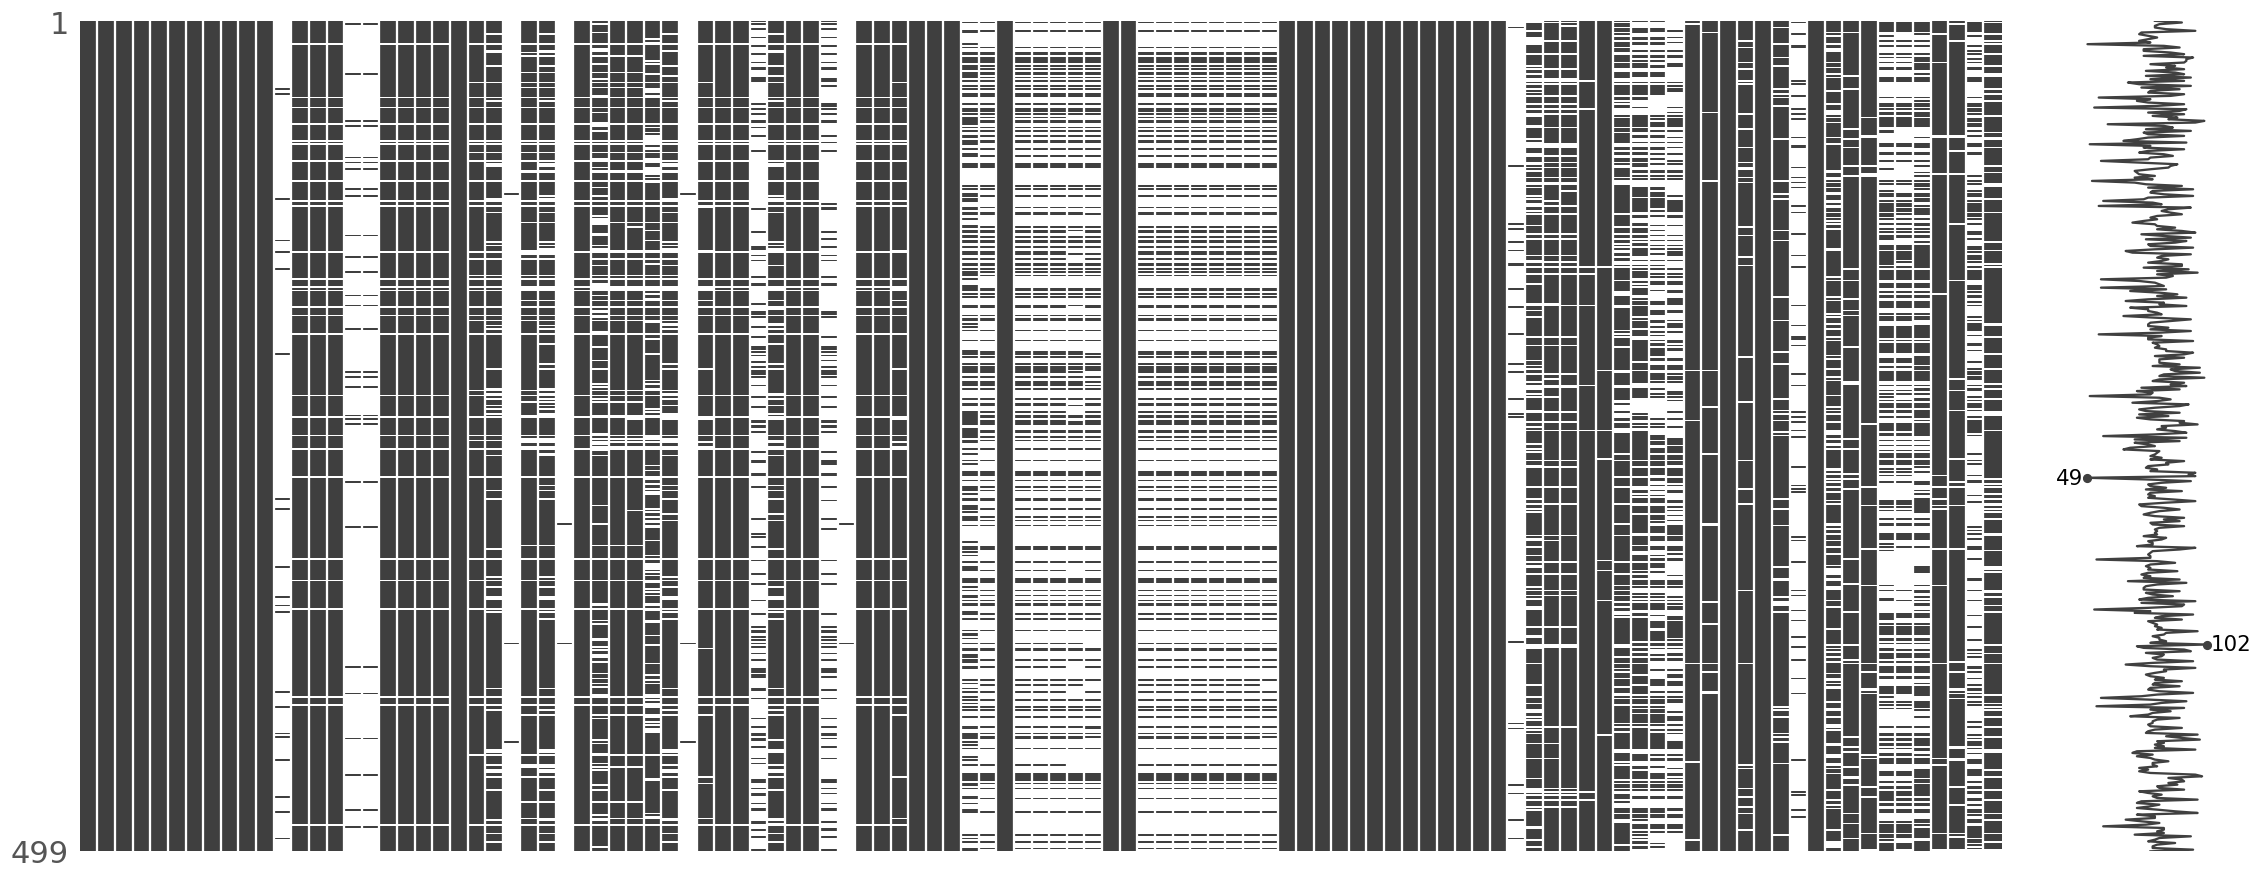

In [ ]:
dvnCombined = pd.read_csv('dvnCombinedLog.csv')
dvnCombined = (dvnCombined               
               .drop(dvnCombined.columns[dvnCombined.nunique() <= 1], axis=1)               
               )
display(dvnCombined)
msno.matrix(dvnCombined)
plt.show()

In [ ]:
# drop sparse data columns
dropCols = dvnCombined.columns[(
    dvnCombined.isna().sum() / dvnCombined.shape[0]) > 0.90]
dvnCombined = dvnCombined.drop(dropCols, axis=1)
print(dropCols)
dvnCombined

Index(['Depth (m)_ST', 'DST Start Depth (TVD) (m)_Pres',
       'DST End Depth (TVD) (m)_Pres', '3rd Valve Open Time_Pres',
       '3rd Shut-in Time_Pres', '3rd Flow Pressure (kPa)_Pres',
       '3rd Shut-in Pressure (kPa)_Pres',
       '01_Battle (Surbiton)[SSTVD] (m)_FT'],
      dtype='object')


UWI  DST Start Depth (MD) (m)  DST End Depth (MD) (m)  \
0    100010107020W500                    1410.6                  1423.4   
1    100010608109W500                    1686.0                  1694.0   
2    100011206021W400                     822.0                   825.0   
3    100011506915W500                    1801.0                  1818.0   
4    100011804403W500                    2007.0                  2018.0   
..                ...                       ...                     ...   
494  102101106218W500                    3105.9                  3113.8   
495  102101403324W400                    2403.0                  2417.0   
496  102102106218W500                    3031.2                  3079.7   
497  102142004709W500                    2290.0                  2305.0   
498  106141105522W400                     701.0                   762.0   

     DST Bottom Hole Temp. (degC)  DST Test Date Test Type DST Misrun  \
0                           48.33          26025       DST          N   
1                           34.26          33647       DST          N   
2                           29.00          29543       DST          N   
3                           64.00          30760       DST          N   
4                           68.00          31153       DST          Y   
..                            ...            ...       ...        ...   
494                        120.00          28210       DST          N   
495                         72.50          32200       DST          N   
496                         83.89          27873       DST          N   
497                         68.80          28876       DST          N   
498                         23.33          28219       DST          N   

     DST Number Formation DSTd  elevation M above sea level  \
0             2      TRmontney                        701.0   
1             1        Dmuskeg                        645.6   
2             4      Dwintrbrn                        651.6   
3             4       Dwabamun                        873.1   
4             1         Mbanff                        946.9   
..          ...            ...                          ...   
494           1       Dswan_hl                        907.1   
495           1      Dbvrhl_lk                        896.5   
496           1       Dswan_hl                        878.7   
497           1       Jrock_ck                        956.3   
498           1        Kviking                        633.1   

     Depths subsea (m)  KB Elev (m)_Pres  DST Number_Pres Formation DSTd_Pres  \
0               716.00             701.0              2.0           TRmontney   
1              1044.40             645.6              1.0             Dmuskeg   
2               171.90             651.6              3.0             Kmannvl   
3               936.40             873.1              4.0            Dwabamun   
4              1065.60             946.9              3.0           Kglauc_ss   
..                 ...               ...              ...                 ...   
494            2202.75             907.1              1.0            Dswan_hl   
495            1513.50             896.5              1.0           Dbvrhl_lk   
496            2176.75             878.7              3.0            Kgething   
497            1341.20             956.3              1.0            Jrock_ck   
498              98.40             633.1              1.0             Kviking   

     DST Start Depth (MD) (m)_Pres  DST End Depth (MD) (m)_Pres  \
0                           1410.6                       1423.4   
1                           1686.0                       1694.0   
2                            615.0                        622.0   
3                           1801.0                       1818.0   
4                           1936.0                       1947.0   
..                             ...                          ...   
494                         3105.9       

In [ ]:
dvnCombined.describe()

DST Start Depth (MD) (m)  DST End Depth (MD) (m)  \
count                499.000000              499.000000   
mean                1955.357715             1975.663727   
std                  700.469072              705.610518   
min                  216.400000              234.700000   
25%                 1516.550000             1526.300000   
50%                 1777.000000             1797.000000   
75%                 2408.000000             2422.000000   
max                 3879.000000             4006.000000   

       DST Bottom Hole Temp. (degC)  DST Test Date  DST Number  \
count                    499.000000     499.000000  499.000000   
mean                      60.631864   27006.494990    2.058116   
std                       22.534025    3995.354937    1.894462   
min                       10.000000   19665.000000    1.000000   
25%                       44.440000   23443.500000    1.000000   
50%                       57.220000   27019.000000    1.000000   
75%                       74.370000   29654.500000    2.000000   
max                      164.440000   37913.000000   16.000000   

       elevation M above sea level  Depths subsea (m)  KB Elev (m)_Pres  \
count                   499.000000         499.000000        471.000000   
mean                    849.426854        1116.083868        844.362208   
std                     140.617601         652.087476        138.247520   
min                     383.400000        -630.950000        383.400000   
25%                     746.650000         679.225000        744.900000   
50%                     846.400000        1015.700000        838.500000   
75%                     940.400000        1468.950000        933.900000   
max                    1320.400000        3084.500000       1320.400000   

       DST Number_Pres  DST Start Depth (MD) (m)_Pres  \
count       471.000000                     471.000000   
mean          2.127389                    1829.171125   
std           1.978801                     681.045865   
min           1.000000                     216.400000   
25%           1.000000                    1436.300000   
50%           1.000000                    1716.000000   
75%           3.000000                    2218.900000   
max          21.000000                    3879.000000   

       DST End Depth (MD) (m)_Pres  DST Test Date_Pres  \
count                   471.000000          471.000000   
mean                   1848.095541        26903.938429   
std                     686.808071         3986.974445   
min                     234.700000        19665.000000   
25%                    1453.250000        23278.000000   
50%                    1730.000000        26918.000000   
75%                    2233.550000        29612.000000   
max                    4006.000000        37914.000000   

       1st Valve Open Time_Pres  2nd Valve Open Time_Pres  \
count                463.000000                422.000000   
mean                  12.105832                 70.829384   
std                   23.103373                 38.251130   
min                    0.000000                  3.000000   
25%                    4.000000                 60.000000   
50%                    5.000000                 60.000000   
75%                   10.000000                 89.000000   
max                  239.000000                320.000000   

       1st Shut-in Time_Pres  2nd Shut-in Time_Pres  \
count             440.000000             396.000000   
mean               48.943182              95.994949   
std                21.942230              54.853960   
min                 0.000000              15.000000   
25%                30.000000              60.000000   
50%                59.000000              90.000000   
75%                60.000000             120.000000   
max               184.000000             355.000000   

       Pressure Recorder Depth (m)_Pres  DST Bottom Hole Temp. (degC)_Pres  \
count                        471.000000    

In [ ]:
dvnData = dvnCombined[['UWI', 'Set_', 'target']].copy()
# bht
dvnData['bhtMD'] = 0.5*(dvnCombined['DST Start Depth (MD) (m)'] +
                        dvnCombined['DST End Depth (MD) (m)'])
dvnData['bhtH'] = dvnCombined['DST End Depth (MD) (m)'] - \
    dvnCombined['DST Start Depth (MD) (m)']
dvnData['bhtTemp'] = dvnCombined['DST Bottom Hole Temp. (degC)']
dvnData['bhtTestDate'] = dvnCombined['DST Test Date']
dvnData['bhtTestType'] = (dvnCombined['Test Type']
                          .replace('0', 0)
                          .replace('DST', 1)
                          .replace('LRT', 2)
                          .replace('CRS', 3)
                          .astype(int))
dvnData['bhtMisrun'] = (dvnCombined['DST Misrun'].str
                        .replace('N', '0')
                        .replace('Y', '1')
                        .astype(int))
dvnData['bhtNumber'] = dvnCombined['DST Number'].astype(int)
dvnData['bhtFormation'] = dvnCombined['Formation DSTd']

# pressure
dvnData['dstH'] = (dvnCombined['DST End Depth (MD) (m)_Pres'] - \
    dvnCombined['DST Start Depth (MD) (m)_Pres']).fillna(dvnData['bhtH'])
dvnData['openTime2'] = dvnCombined['2nd Valve Open Time_Pres']
dvnData['shutinTime2'] = dvnCombined['2nd Shut-in Time_Pres']
dvnData['hydroStatic'] = dvnCombined['Initial Hydrostatic Pressure (kPa)_Pres']
dvnData['flowPres2'] = dvnCombined['2nd Flow Pressure (kPa)_Pres']
dvnData['shutinPres2'] = dvnCombined['2nd Shut-in Pressure (kPa)_Pres']

dvnData['dstSlope2Initial'] = (dvnCombined['2nd Shut-in Initial Slope_Pres']
                               .replace(0, np.nan)
#                                .fillna(dvnCombined['1st Shut-in Initial Slope_Pres'])
#                                .replace(0, np.nan)
                              )
dvnData['dstSlope2Final'] = (dvnCombined['2nd Shut-in Final Slope_Pres']
                             .replace(0, np.nan)
#                              .fillna(dvnCombined['1st Shut-in Final Slope_Pres'])
#                              .replace(0, np.nan)
                            )

# production
dvnData['spudDate'] = (pd.to_datetime(
    dvnCombined['Spud Date_Prod']) - pd.to_datetime('01/01/1900')).dt.days
dvnData['td'] = dvnCombined['Measured Depth (m)_Prod']
dvnData['ttvd'] = dvnCombined['Total Vertical Depth (m)_Prod']
dvnData['kbElevation'] = dvnCombined['Elevation Kelly Bushing (m)_Prod']
dvnData['groundElevation'] = dvnCombined['Elevation Ground (m)_Prod']
dvnData['oilCum'] = dvnCombined['Oil Total Cum (bbl)_Prod']
dvnData['gasCum'] = dvnCombined['Gas Total Cum (mcf)_Prod']
dvnData['watCum'] = dvnCombined['Water Total Cum (bbl)_Prod']
dvnData['oilMax'] = dvnCombined['Oil Maximum (bbl)_Prod']
dvnData['gasMax'] = dvnCombined['Gas Maximum (mcf)_Prod']
dvnData['watMax'] = dvnCombined['Water Maximum (bbl)_Prod']
dvnData['yieldAvg'] = dvnCombined['Yield Total Average_Prod'] 
dvnData['bhtMDSS'] = dvnData['bhtMD'] - dvnData['kbElevation']

# wellheader
dvnData['surfLat'] = dvnCombined['SurfaceLatitude_NAD83_WH']
dvnData['surfLon'] = dvnCombined['SurfaceLongitude_NAD83_WH']
dvnData['bottLat'] = dvnCombined['BottomLatitude_NAD83_WH']
dvnData['bottLon'] = dvnCombined['BottomLongitude_NAD83_WH']

# formation top
dvnData['bottX'] = dvnCombined['Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)_FT']
dvnData['bottY'] = dvnCombined['Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)_FT']

# well log data
dvnData['gr'] = dvnCombined['gr']
dvnData['sp'] = dvnCombined['sp']
dvnData['den'] = dvnCombined['den']
dvnData['porNeu'] = dvnCombined['porNeu']
dvnData['resDP'] = dvnCombined['resDP']
dvnData['sonic'] = dvnCombined['sonic']

In [ ]:
dvnData.insert(5, 'bhtZ',
               dvnData['bhtMD'] - (dvnData['kbElevation'] - dvnData['groundElevation']))
# dvnData.insert(6, 'bhtZ2', dvnData['bhtZ']**2)
# dvnData.insert(7, 'bhtZ3', dvnData['bhtZ']**3)
# dvnData.insert(8, 'bhtZ4', dvnData['bhtZ']**4)
dvnData.insert(15, 'dstPerm', 1 / (dvnData['dstH'] * dvnData['dstSlope2Final']))
dvnData

UWI                Set_  target    bhtMD  bhtH       bhtZ  \
0    100010107020W500            Training   60.97  1417.00  12.8  1413.0376   
1    100010608109W500            Training   63.98  1690.00   8.0  1685.1232   
2    100011206021W400            Training   39.07   823.50   3.0   818.6232   
3    100011506915W500            Training   69.47  1809.50  17.0  1803.4040   
4    100011804403W500            Training   75.23  2012.50  11.0  2007.6232   
..                ...                 ...     ...      ...   ...        ...   
494  102101106218W500  Validation_Testing     NaN  3109.85   7.9  3105.8876   
495  102101403324W400  Validation_Testing     NaN  2410.00  14.0  2403.9040   
496  102102106218W500  Validation_Testing     NaN  3055.45  48.5  3050.2684   
497  102142004709W500            Training   81.48  2297.50  15.0  2291.7088   
498  106141105522W400            Training   32.98   731.50  61.0   726.3184   

     bhtTemp  bhtTestDate  bhtTestType  bhtMisrun  bhtNumber bhtFormation  \
0      48.33        26025            1          0          2    TRmontney   
1      34.26        33647            1          0          1      Dmuskeg   
2      29.00        29543            1          0          4    Dwintrbrn   
3      64.00        30760            1          0          4     Dwabamun   
4      68.00        31153            1          1          1       Mbanff   
..       ...          ...          ...        ...        ...          ...   
494   120.00        28210            1          0          1     Dswan_hl   
495    72.50        32200            1          0          1    Dbvrhl_lk   
496    83.89        27873            1          0          1     Dswan_hl   
497    68.80        28876            1          0          1     Jrock_ck   
498    23.33        28219            1          0          1      Kviking   

     dstH  openTime2  shutinTime2   dstPerm  hydroStatic  flowPres2  \
0    12.8       60.0         90.0  0.005208     15899.31    2392.48   
1     8.0       63.0        114.0  0.012500     18922.00    1564.00   
2     7.0       90.0        180.0  0.028571      6615.00    2358.00   
3    17.0       88.0        130.0  0.001471     20633.00     853.00   
4    11.0       60.0        120.0       NaN     21403.00    1240.00   
..    ...        ...          ...       ...          ...        ...   
494   7.9       60.0         60.0  0.126582     33218.95   28964.88   
495  14.0       61.0         97.0  0.071429     27491.00     672.00   
496  15.8       90.0         90.0  0.001406     21435.81    2888.90   
497  15.0       90.0        150.0  0.002222     24803.00    1127.00   
498  61.0       60.0         90.0  0.001639      7866.92    1344.48   

     shutinPres2  dstSlope2Initial  dstSlope2Final  spudDate         td  \
0       12403.67              86.0            15.0     26001  2767.8888   
1        9569.00              88.0            10.0     33635  1744.9800   
2        5272.00              85.0             5.0     29526  1491.9960   
3       12100.00              80.0            40.0     30731  2709.9768   
4        3778.00               NaN             NaN     31124  2791.9680   
..           ...               ...             ...       ...        ...   
494     28964.88               2.0             1.0     28178  3193.0848   
495       828.00               2.0             1.0     32175  2530.1448   
496     10424.88              80.0            45.0     27841  3175.1016   
497      6573.00              40.0            30.0     28836  3454.9080   
498      5019.38              80.0            10.0     28209  1926.0312   

          ttvd  kbElevation  groundElevation     oilCum       gasCum  \
0    2767.8888     701.0400         697.0776        NaN          NaN   
1    1744.9800     645.8712         640.9944   3422.286     2722.761   
2    1491.9960     651.9672         647.0904        NaN          NaN   
3    2709.9768     872.9472         866.8512        NaN          NaN   
4    2791.9680     947.0136   

In [ ]:
# naive mean encoding bhtFormation
temp = (dvnData.groupby('bhtFormation')['target'].mean())
temp = 0.5 * (temp.ffill() + temp.bfill())
dvnData['bhtFormation'] = dvnData['bhtFormation'].map(temp)

In [ ]:
# # fillna dst data
# # might need a better way, eg knn imputing
# for col in ['dstSlope2Initial', 'dstSlope2Final', 'dstPerm']: 
#     dvnData[col] = dvnData[col].fillna(dvnData[col].median())
# dvnData = dvnData[dvnData.porNeu<1]
dvnData = dvnData.fillna(value=dvnData.median())

In [ ]:
msno.matrix(dvnData)
plt.show()
display(dvnData.info())

In [ ]:
# dvnData.to_csv('dvnData.csv', index=False)

### All Columns

In [ ]:
# dropFeats = ['bhtMD', 'kbElevation', 'td', 'ttvd', 'surfLat', 'surfLon', 'bottLat', 'bottLon']
dropFeats = ['porNeu']
dvnData1 = dvnData.drop(dropFeats, axis=1).copy(deep=True)
dvnData1 = dvnData1.dropna().copy(deep=True)

In [ ]:
X_train = (dvnData1[dvnData1.Set_ == 'Training']
           .drop(['Set_', 'target', 'UWI'], axis=1)
           .copy(deep=True))
y_train = dvnData1[dvnData1.Set_ == 'Training']['target'].copy(deep=True)
X_test = (dvnData1[dvnData1.Set_ == 'Validation_Testing']
          .drop(['Set_', 'target', 'UWI'], axis=1)
          .copy(deep=True))

#### InterpretML

In [ ]:
!pip install interpret

In [ ]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret import show

In [ ]:
ebm = ExplainableBoostingRegressor(random_state=55)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(binning='quantile', early_stopping_rounds=50,
                             early_stopping_tolerance=0.0001,
                             feature_names=['bhtMD', 'bhtH', 'bhtZ', 'bhtTemp',
                                            'bhtTestDate', 'bhtTestType',
                                            'bhtMisrun', 'bhtNumber',
                                            'bhtFormation', 'dstH', 'openTime2',
                                            'shutinTime2', 'dstPerm',
                                            'hydroStatic', 'flowPres2',
                                            'shutinPres2', 'dstSlope2Initial',
                                            'dstSlope2Final', 'spudDate', '...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                          

In [ ]:
ebm_global = ebm.explain_global()
show(ebm_global)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ebm_local = ebm.explain_local(X_train, y_train)
# show(ebm_local)

#### Shap

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 4.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491631 sha256=204b88ac8be838c9aa9a194e32c0f3ff522864c5a50cb100c07458dff31cf9e1
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
shap.initjs()
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
model = ExtraTreesRegressor(criterion='mae', random_state=55)
score = cross_val_score(model, X_train, y_train,
                        cv=KFold(5, shuffle=True, random_state=55),
                        scoring='neg_mean_absolute_error')
print(score, score.mean(), score.std())

[-3.48414667 -3.35654667 -3.56704865 -4.29192132 -5.49944639] -4.039821939605146 0.7991510921995653


In [ ]:
model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=55, verbose=0, warm_start=False)

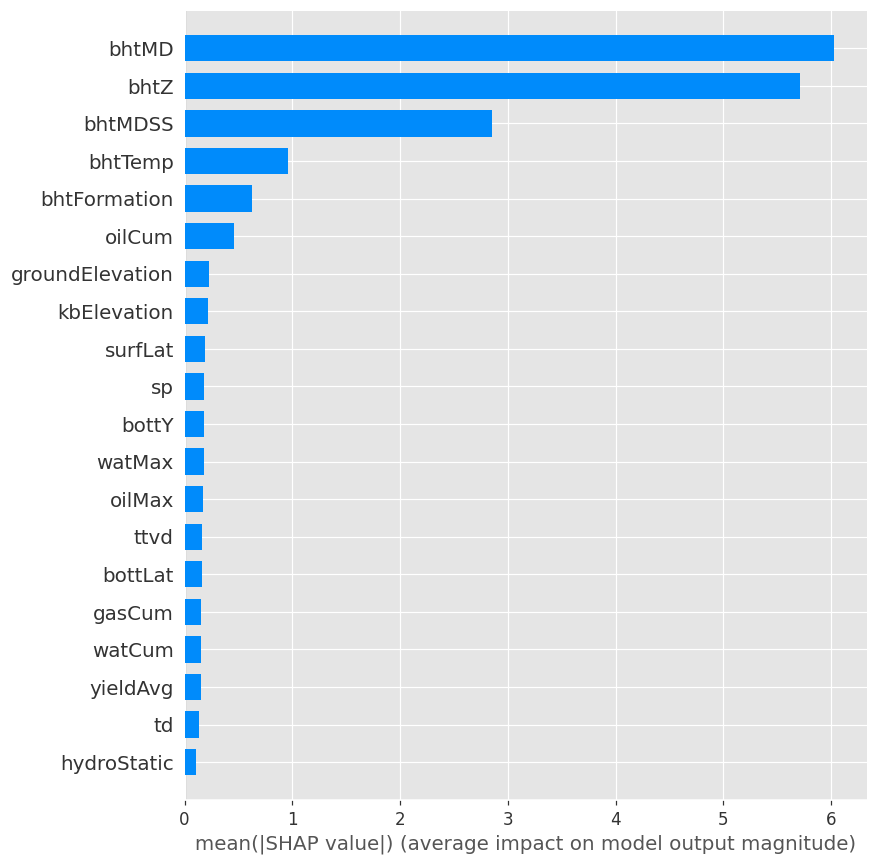

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

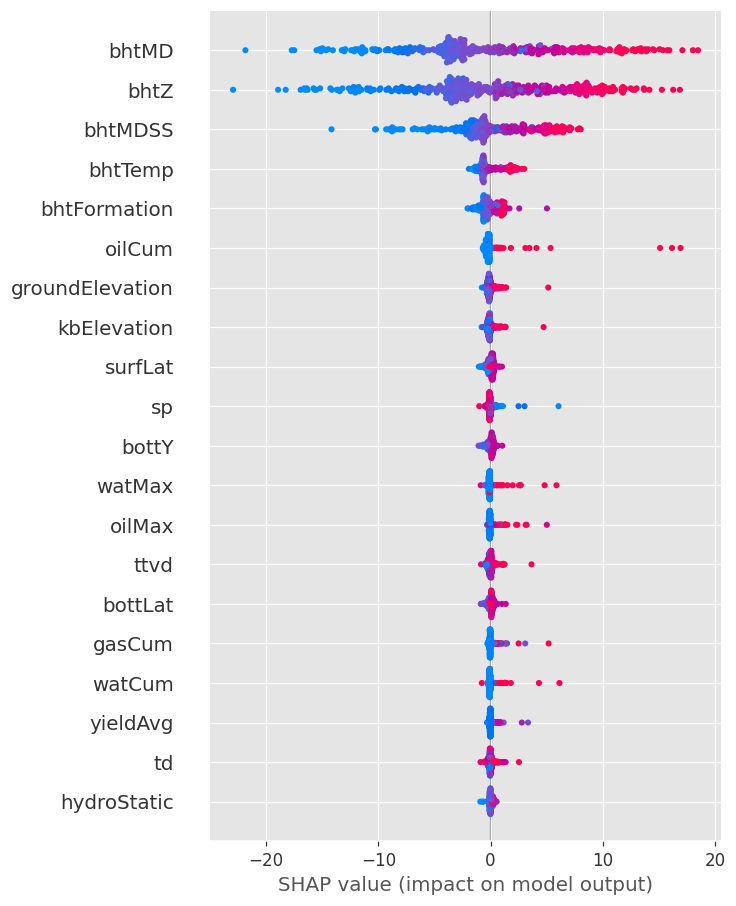

In [ ]:
f = plt.figure()
shap.summary_plot(shap_values, X_train, color_bar=False, plot_size=(6, 10))

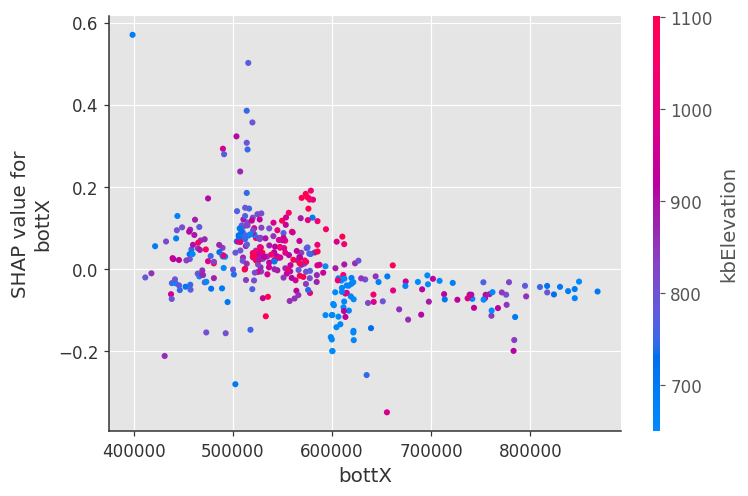

In [ ]:
shap.dependence_plot('bottX', shap_values, X_train)

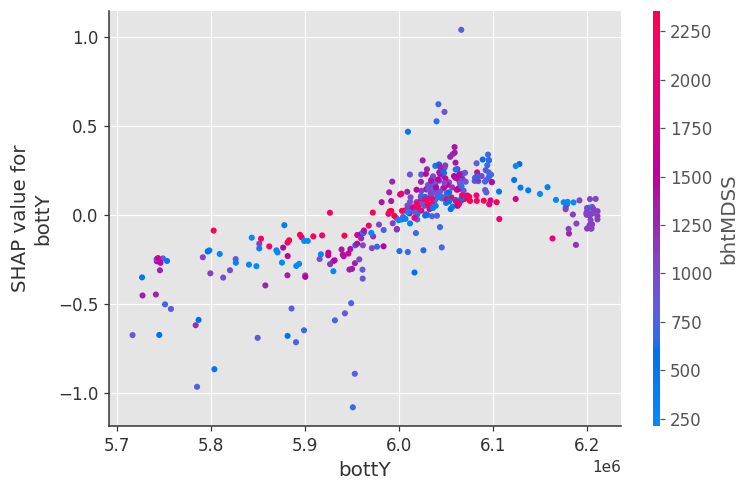

In [ ]:
shap.dependence_plot('bottY', shap_values, X_train)

In [ ]:
shap.initjs()
exp_values = shap.KernelExplainer(model.predict, X_train).expected_value
shap.force_plot(exp_values, shap_values, X_train, )

Using 372 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


#### Feature Ranking

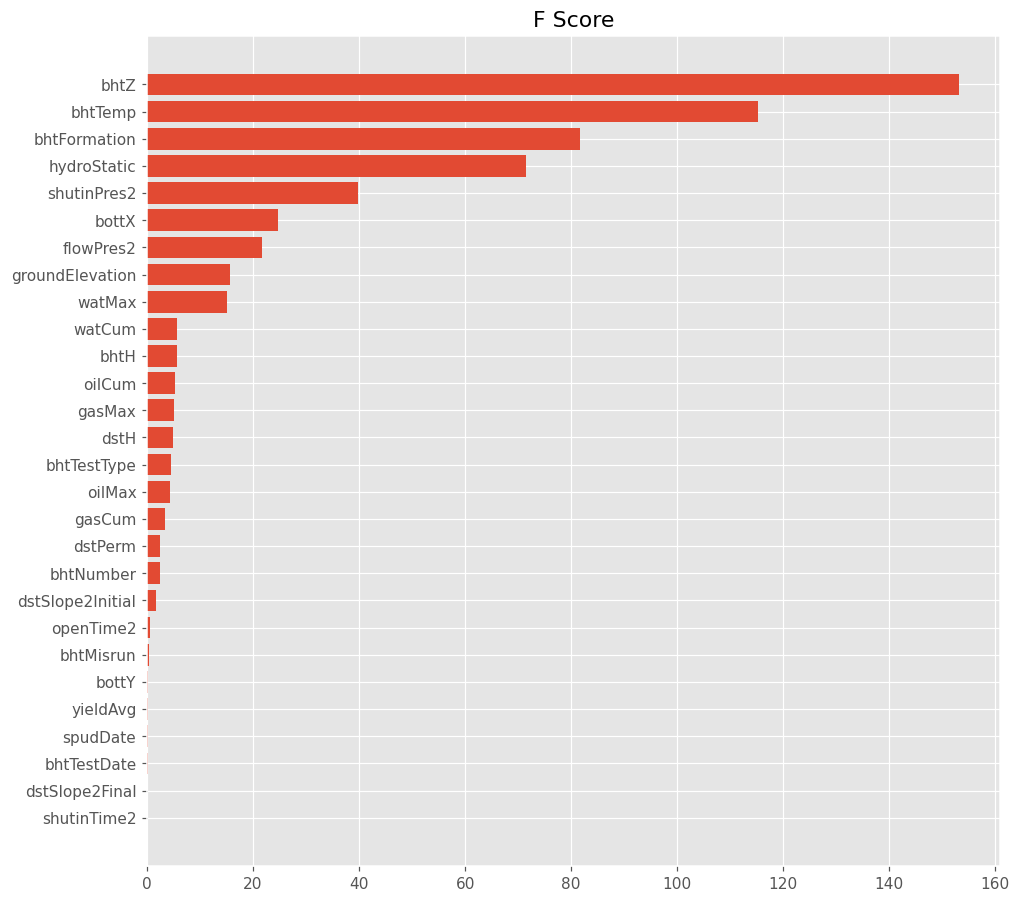

In [ ]:
fScore = SelectKBest(f_regression, k='all')
fScore.fit(X_train, y_train.values.ravel())
fdf = (pd.DataFrame(zip(X_train.columns, fScore.scores_),
                   columns=['features', 'fScore'])
       .sort_values('fScore', ascending=True))
plt.figure(figsize=(10, 10))
plt.barh(fdf.features, fdf.fScore)
plt.title('F Score')
plt.show()

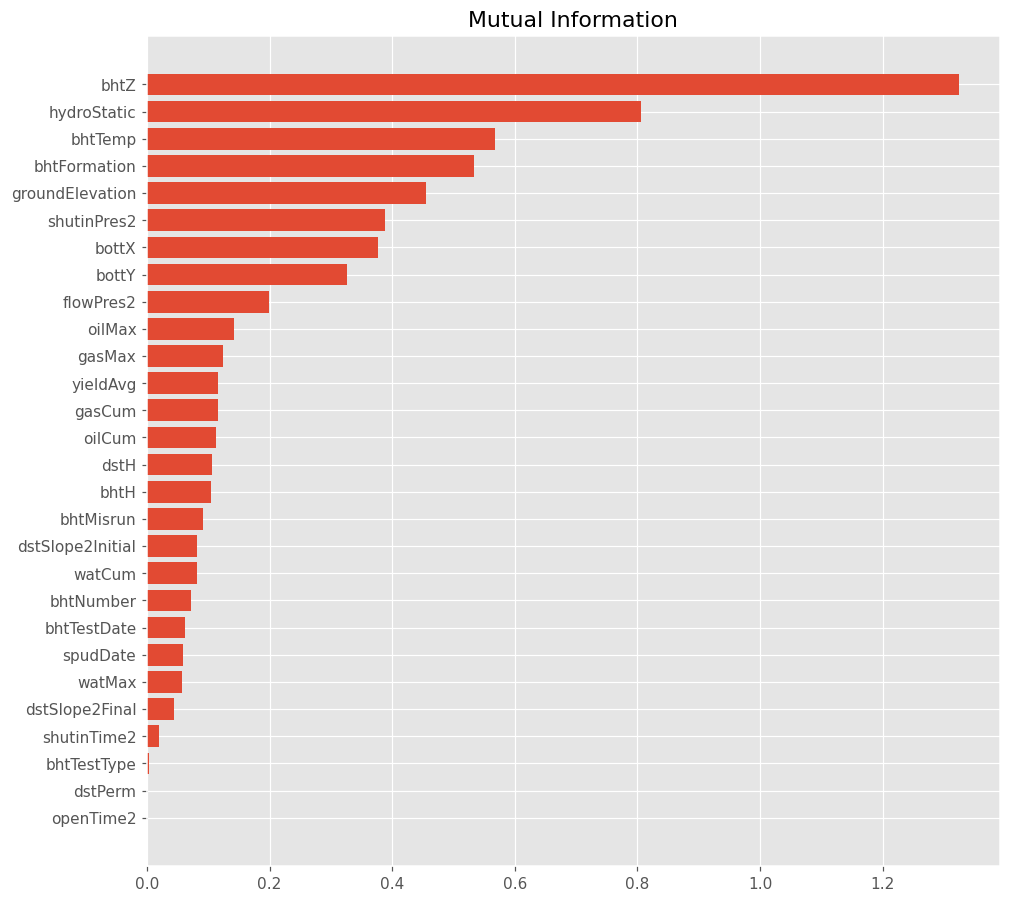

In [ ]:
miScore = SelectKBest(mutual_info_regression, k='all')
miScore.fit(X_train, y_train.values.ravel())
midf = (pd.DataFrame(zip(X_train.columns, miScore.scores_),
                    columns=['features', 'miScore'])
        .sort_values('miScore', ascending=True))
plt.figure(figsize=(10, 10))
plt.barh(midf.features, midf.miScore)
plt.title('Mutual Information')
plt.show()

## Eaglebine

UWI    SurfLat    SurfLong     TD (m)       GL(m)  \
0    42013301410000  28.690426  -98.470138  5982.9192  105.430320   
1    42013301930000  28.779921  -98.208313  3284.2200  121.127520   
2    42013302760000  28.994360  -98.421799  1880.0064  140.329920   
3    42013305480000  28.759118  -98.156410  2498.7504  125.089920   
4    42013310190000  28.817400  -98.155319  3352.8000  155.118816   
..              ...        ...         ...        ...         ...   
317  42493322270000  29.059620  -98.210121  1947.6720  148.559520   
318  42507007550000  28.775181  -99.562393  4923.1296  233.598720   
319  42507312420000  28.742901 -100.077454  3084.5760  201.381360   
320  42507312960000  29.075911 -100.006371  2191.8168  255.986280   
321  42507326870000  29.001905  -99.586898  1224.0768  240.151920   

     BHT_below sea level (m)  BHT_ subsurface (m)  \
0                3725.418000           3830.84832   
1                3168.700800           3289.82832   
2                1747.418400           1887.74832   
3                2379.268800           2504.35872   
4                3203.289504           3358.40832   
..                       ...                  ...   
317              1804.720800           1953.28032   
318              1296.619200           1530.21792   
319               992.946960           1194.32832   
320              1929.246840           2185.23312   
321               989.533200           1229.68512   

     BHTorMRT (maximum recorded temperature) (oC)  \
0                                       61.666667   
1                                      107.222222   
2                                       65.555556   
3                                       76.666667   
4                                       98.888889   
..                                            ...   
317                                     73.333333   
318                                     65.555556   
319                                     54.444444   
320                                     67.222222   
321                                     50.000000   

     TSC or ORT (time since circulation or original recorded time in hours)  \
0                                                                      5.50   
1                                                                     11.00   
2                                                                      5.50   
3                                                                      5.00   
4                                                                      7.75   
..                                                                      ...   
317                                                                    6.00   
318                                                                    4.00   
319                                                                    3.00   
320                                                                    9.00   
321                                                                    4.00   

     Depth (m)_ST  MinCasingSize_Casing spuddate_Casing completiondate_Casing  \
0             NaN                   NaN             NaN                   NaN   
1       3261.3600                 5.500             NaN            1972-07-22   
2             NaN                 4.500             NaN            1975-07-28   
3             NaN                 2.875      1977-01-23            1977-02-24   
4             NaN                   NaN             NaN                   NaN   
..            ...                   ...             ...                   ...   
317           NaN                   NaN             NaN                   NaN   
318           NaN                   NaN             NaN                   NaN   
319           NaN                 2.375      1979-10-11            1980-01-28   
320           NaN                   NaN             NaN                   NaN   
321     1224.0768                 4.500      2006-05-30            2006-0

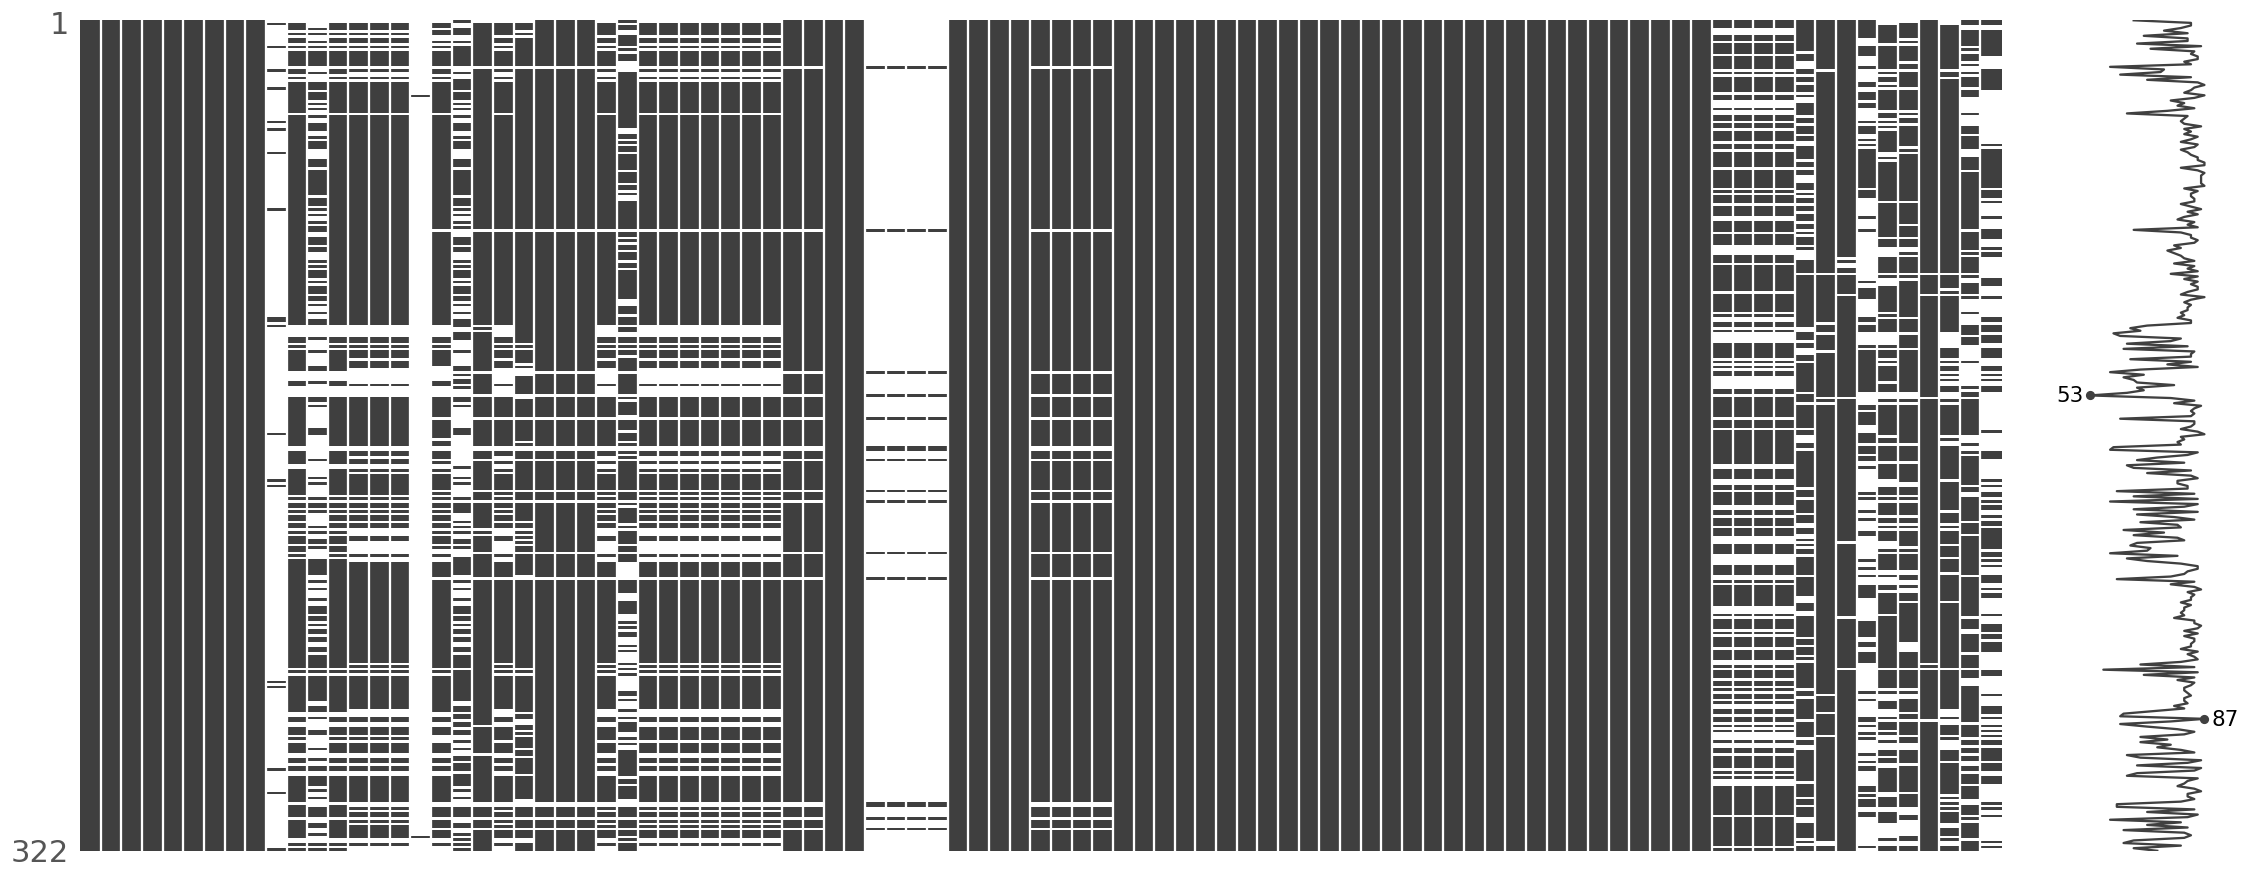

In [ ]:
egbCombined = pd.read_csv('egbCombinedLog.csv', dtype={'UWI': str})
egbCombined = (egbCombined               
               .drop(egbCombined.columns[egbCombined.nunique() <= 1], axis=1)               
               )
display(egbCombined)
msno.matrix(egbCombined)
plt.show()

In [ ]:
# drop sparse data columns
dropCols = egbCombined.columns[(
    egbCombined.isna().sum() / egbCombined.shape[0]) > 0.90]
egbCombined = egbCombined.drop(dropCols, axis=1)
print(dropCols)
egbCombined

Index(['Depth (m)_ST', 'Measured Depth (m)_Prod', 'WGS84Latitude_WH',
       'WGS84Longitude_WH', 'SurfLat_WH', 'SurfLong_WH'],
      dtype='object')


UWI    SurfLat    SurfLong     TD (m)       GL(m)  \
0    42013301410000  28.690426  -98.470138  5982.9192  105.430320   
1    42013301930000  28.779921  -98.208313  3284.2200  121.127520   
2    42013302760000  28.994360  -98.421799  1880.0064  140.329920   
3    42013305480000  28.759118  -98.156410  2498.7504  125.089920   
4    42013310190000  28.817400  -98.155319  3352.8000  155.118816   
..              ...        ...         ...        ...         ...   
317  42493322270000  29.059620  -98.210121  1947.6720  148.559520   
318  42507007550000  28.775181  -99.562393  4923.1296  233.598720   
319  42507312420000  28.742901 -100.077454  3084.5760  201.381360   
320  42507312960000  29.075911 -100.006371  2191.8168  255.986280   
321  42507326870000  29.001905  -99.586898  1224.0768  240.151920   

     BHT_below sea level (m)  BHT_ subsurface (m)  \
0                3725.418000           3830.84832   
1                3168.700800           3289.82832   
2                1747.418400           1887.74832   
3                2379.268800           2504.35872   
4                3203.289504           3358.40832   
..                       ...                  ...   
317              1804.720800           1953.28032   
318              1296.619200           1530.21792   
319               992.946960           1194.32832   
320              1929.246840           2185.23312   
321               989.533200           1229.68512   

     BHTorMRT (maximum recorded temperature) (oC)  \
0                                       61.666667   
1                                      107.222222   
2                                       65.555556   
3                                       76.666667   
4                                       98.888889   
..                                            ...   
317                                     73.333333   
318                                     65.555556   
319                                     54.444444   
320                                     67.222222   
321                                     50.000000   

     TSC or ORT (time since circulation or original recorded time in hours)  \
0                                                                      5.50   
1                                                                     11.00   
2                                                                      5.50   
3                                                                      5.00   
4                                                                      7.75   
..                                                                      ...   
317                                                                    6.00   
318                                                                    4.00   
319                                                                    3.00   
320                                                                    9.00   
321                                                                    4.00   

     MinCasingSize_Casing spuddate_Casing completiondate_Casing  \
0                     NaN             NaN                   NaN   
1                   5.500             NaN            1972-07-22   
2                   4.500             NaN            1975-07-28   
3                   2.875      1977-01-23            1977-02-24   
4                     NaN             NaN                   NaN   
..                    ...             ...                   ...   
317                   NaN             NaN                   NaN   
318                   NaN             NaN                   NaN   
319                 2.375      1979-10-11            1980-01-28   
320                   NaN             NaN                   NaN   
321                 4.500      2006-05-30            2006-06-15   

     cumoil_Casing  cumgas_Casing  cumwater_Casing  \
0              NaN            NaN              NaN   
1         6140.000    8702967.000      1002330.677 

In [ ]:
for col1, col2 in zip(['Spud Date_Prod', 'Completion Date_Prod',
                       'Oil Total Cum (bbl)_Prod', 'Gas Total Cum (mcf)_Prod', 'Water Total Cum (bbl)_Prod'],
                      ['spuddate_Casing', 'completiondate_Casing',
                       'cumoil_Casing', 'cumgas_Casing', 'cumwater_Casing']):
    egbCombined[col1] = egbCombined[col1].fillna(egbCombined[col2])
egbCombined['GOR Total Average_Prod'] = (egbCombined['GOR Total Average_Prod']
                                         .replace(np.inf, 1e10)
                                         .fillna(1000 *
                                                 egbCombined['Gas Total Cum (mcf)_Prod'] / egbCombined['Oil Total Cum (bbl)_Prod'])
                                         .replace(np.inf, 1e10))

In [ ]:
egbData = egbCombined[['UWI', 'Set_', 'target']].copy(deep=True)

# bht
egbData['td'] = egbCombined['TD (m)']
egbData['groundElevation'] = egbCombined['GL(m)']
egbData['bhtZ'] = egbCombined['BHT_ subsurface (m)']
egbData['bhtTemp'] = egbCombined['BHTorMRT (maximum recorded temperature) (oC)']
egbData['bhtTSC'] = egbCombined['TSC or ORT (time since circulation or original recorded time in hours)'] 

# casing
egbData['minCasingSize'] = egbCombined['MinCasingSize_Casing'] 

# production
egbData['ttvd'] = egbCombined['Total Vertical Depth (m)_Prod']
egbData['spudDate'] = (pd.to_datetime(
    egbCombined['Spud Date_Prod']) - pd.to_datetime('01/01/1900')).dt.days
egbData['completionDate'] = (pd.to_datetime(
    egbCombined['Completion Date_Prod']) - pd.to_datetime('01/01/1900')).dt.days
egbData['oilCum'] = egbCombined['Oil Total Cum (bbl)_Prod']
egbData['gasCum'] = egbCombined['Gas Total Cum (mcf)_Prod']
egbData['watCum'] = egbCombined['Water Total Cum (bbl)_Prod']
egbData['gor'] = egbCombined['GOR Total Average_Prod']
egbData['plugDate'] = (pd.to_datetime(
    egbCombined['Plug Date_Prod']) - pd.to_datetime('01/01/1900')).dt.days
egbData['startProd'] = (pd.to_datetime(
    egbCombined['First Production Month_Prod']) - pd.to_datetime('01/01/1900')).dt.days
egbData['stopProd'] = (pd.to_datetime(
    egbCombined['Last Production Month_Prod']) - pd.to_datetime('01/01/1900')).dt.days
egbData['gasMax'] = egbCombined['Gas Maximum (mcf)_Prod']
egbData['oilMax'] = egbCombined['Oil Maximum (bbl)_Prod']
egbData['watMax'] = egbCombined['Water Maximum (bbl)_Prod']

# wellheader
egbData['kbElevation'] = egbCombined['Elevation_WH']
egbData['surfLat'] = egbCombined['SurfaceLatitude_NAD83_WH']
egbData['surfLon'] = egbCombined['SurfaceLongitude_NAD83_WH']
egbData['bottLat'] = egbCombined['BottomLatitude_NAD83_WH']
egbData['bottLon'] = egbCombined['BottomLongitude_NAD83_WH']

# formation top
egbData['bottX'] = egbCombined['X(m)_FT']
egbData['bottY'] = egbCombined['Y(m)_FT'] 

# mud weight
egbData['mudWeight'] = egbCombined['Mud Wt_MW']

# well log data
egbData['gr'] = egbCombined['gr']
egbData['sp'] = egbCombined['sp']
egbData['den'] = egbCombined['den']
egbData['porNeu'] = egbCombined['porNeu']
egbData['resDP'] = egbCombined['resDP']
egbData['sonic'] = egbCombined['sonic']

In [ ]:
egbData.insert(5, 'bhtMD', 
               egbData['bhtZ'] - egbData['groundElevation'] + egbData['kbElevation'])
egbData.insert(6, 'bhtMDSS', 
               egbData['bhtZ'] - egbData['groundElevation'])
# egbData.insert(7, 'bhtZ2', egbData['bhtZ']**2)
# egbData.insert(8, 'bhtZ3', egbData['bhtZ']**3)
# egbData.insert(9, 'bhtZ4', egbData['bhtZ']**4)
display(egbData)
egbData.info()

UWI                Set_      target         td  \
0    42013301410000            Training  141.555556  5982.9192   
1    42013301930000            Training  132.778000  3284.2200   
2    42013302760000            Training   89.161111  1880.0064   
3    42013305480000            Training  107.961111  2498.7504   
4    42013310190000            Training  133.722222  3352.8000   
..              ...                 ...         ...        ...   
317  42493322270000  Validation_Testing         NaN  1947.6720   
318  42507007550000            Training   78.161111  4923.1296   
319  42507312420000  Validation_Testing         NaN  3084.5760   
320  42507312960000            Training   94.794444  2191.8168   
321  42507326870000            Training   78.888889  1224.0768   

     groundElevation        bhtMD      bhtMDSS        bhtZ     bhtTemp  \
0         105.430320  3828.647664  3725.418000  3830.84832   61.666667   
1         121.127520  3285.923832  3168.700800  3289.82832  107.222222   
2         140.329920  1882.140000  1747.418400  1887.74832   65.555556   
3         125.089920  2498.750400  2379.268800  2504.35872   76.666667   
4         155.118816  3353.626008  3203.289504  3358.40832   98.888889   
..               ...          ...          ...         ...         ...   
317       148.559520  1946.989248  1804.720800  1953.28032   73.333333   
318       233.598720  1524.609600  1296.619200  1530.21792   65.555556   
319       201.381360  1194.913536   992.946960  1194.32832   54.444444   
320       255.986280  2179.624800  1929.246840  2185.23312   67.222222   
321       240.151920  1223.144112   989.533200  1229.68512   50.000000   

     bhtTSC  minCasingSize       ttvd  spudDate  completionDate    oilCum  \
0      5.50            NaN        NaN   25976.0             NaN     0.000   
1     11.00          5.500  3284.2200       NaN         26500.0  6140.000   
2      5.50          4.500  1880.0064       NaN         27601.0  1929.332   
3      5.00          2.875        NaN   28146.0         28178.0     0.000   
4      7.75            NaN  3352.8000   29444.0         29517.0  4424.000   
..      ...            ...        ...       ...             ...       ...   
317    6.00            NaN        NaN   33126.0         33137.0     0.000   
318    4.00            NaN        NaN       NaN         25021.0     0.000   
319    3.00          2.375  3069.3360   29137.0         29246.0     0.000   
320    9.00            NaN        NaN       NaN         29254.0     0.000   
321    4.00          4.500        NaN   38865.0         38881.0     0.000   

          gasCum       watCum           gor  plugDate  startProd  stopProd  \
0          0.000        0.000           NaN   26345.0        NaN       NaN   
1    8702967.000  1002330.677  1.417421e+06       NaN    26479.0   44164.0   
2          7.992        0.000  4.142366e+00   31979.0    27574.0   29616.0   
3      10067.000        0.000  1.000000e+10   30663.0    28155.0   29066.0   
4    6610808.000    47611.388  1.494306e+06       NaN    29524.0   44164.0   
..           ...          ...           ...       ...        ...       ...   
317        0.000        0.000           NaN   33137.0        NaN       NaN   
318        0.000        0.000           NaN       NaN        NaN       NaN   
319     3037.000        0.000  1.000000e+10   41636.0    29981.0   30315.0   
320        0.000        0.000           NaN   29254.0        NaN       NaN   
321        0.000        0.000           NaN   40044.0        NaN       NaN   

        gasMax   oilMax    watMax  kbElevation    surfLat     surfLon  \
0          NaN      NaN       NaN   103.229664  28.690101  -98.469817   
1    98093.000  271.000  11771.16   117.223032  28.780042  -98.208395   
2        0.333  533.333      0.00   134.721600  28.994810  -98.422767   
3     1464.000    0.000      0.00   119.481600  28.963395  -98.295961   
4    63674.000  108.000    870.74   150.336504  28.817939  -98.155472   
..         ...      ...       ... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UWI              322 non-null    object 
 1   Set_             322 non-null    object 
 2   target           243 non-null    float64
 3   td               322 non-null    float64
 4   groundElevation  322 non-null    float64
 5   bhtMD            322 non-null    float64
 6   bhtMDSS          322 non-null    float64
 7   bhtZ             322 non-null    float64
 8   bhtTemp          322 non-null    float64
 9   bhtTSC           322 non-null    float64
 10  minCasingSize    266 non-null    float64
 11  ttvd             250 non-null    float64
 12  spudDate         175 non-null    float64
 13  completionDate   306 non-null    float64
 14  oilCum           312 non-null    float64
 15  gasCum           312 non-null    float64
 16  watCum           312 non-null    float64
 17  gor             

In [ ]:
# egbData = egbData[egbData.porNeu < 1]
egbData = egbData.fillna(egbData.median())

In [ ]:
msno.matrix(egbData)
plt.show()
display(egbData.info())

In [ ]:
# egbData.to_csv('egbData.csv', index=False)

### All Columns

In [ ]:
# dropFeats = ['bhtMD', 'kbElevation', 'td', 'ttvd', 'surfLat', 'surfLon', 'bottLat', 'bottLon']
dropFeats = ['porNeu']
egbData1 = egbData.drop(dropFeats, axis=1).copy(deep=True)
egbData1 = egbData1.dropna().copy(deep=True)

In [ ]:
X_train = (egbData1
           .query('Set_ == "Training" & UWI not in []') 
           .drop(['Set_', 'target', 'UWI'], axis=1)
           .copy(deep=True))
y_train = (egbData1
           .query('Set_ == "Training" & UWI not in []')['target']
           .copy(deep=True))
X_test = (egbData1
          .query('Set_ == "Validation_Testing"')
          .drop(['Set_', 'target', 'UWI'], axis=1)
          .copy(deep=True))

#### InterpretML

In [ ]:
ebm = ExplainableBoostingRegressor(random_state=55)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(binning='quantile', early_stopping_rounds=50,
                             early_stopping_tolerance=0.0001,
                             feature_names=['td', 'groundElevation', 'bhtMD',
                                            'bhtMDSS', 'bhtZ', 'bhtTemp',
                                            'bhtTSC', 'minCasingSize', 'ttvd',
                                            'spudDate', 'completionDate',
                                            'oilCum', 'gasCum', 'watCum', 'gor',
                                            'plugDate', 'startProd', 'stopProd',
                                            'gasMax', 'oilMax', 'watMax',
                                            'kbElevation', 'sur...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                       

In [ ]:
ebm_global = ebm.explain_global()
show(ebm_global)

Output hidden; open in https://colab.research.google.com to view.

#### Shap

In [ ]:
model = ExtraTreesRegressor(criterion='mae', random_state=55)
score = cross_val_score(model, X_train, y_train,
                        cv=KFold(5, shuffle=True, random_state=55),
                        scoring='neg_mean_absolute_error')
print(score, score.mean(), score.std())

[-4.65993357 -4.70292895 -3.60030241 -5.82911797 -3.35918337] -4.430293253600801 0.8854305949419333


In [ ]:
model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=55, verbose=0, warm_start=False)

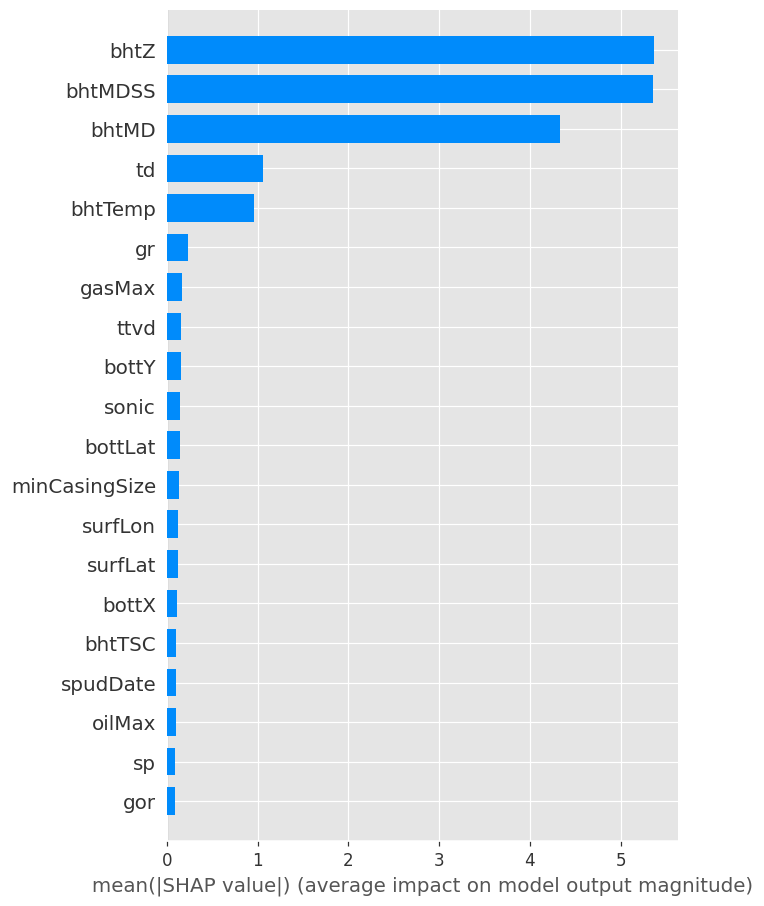

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(6, 10))

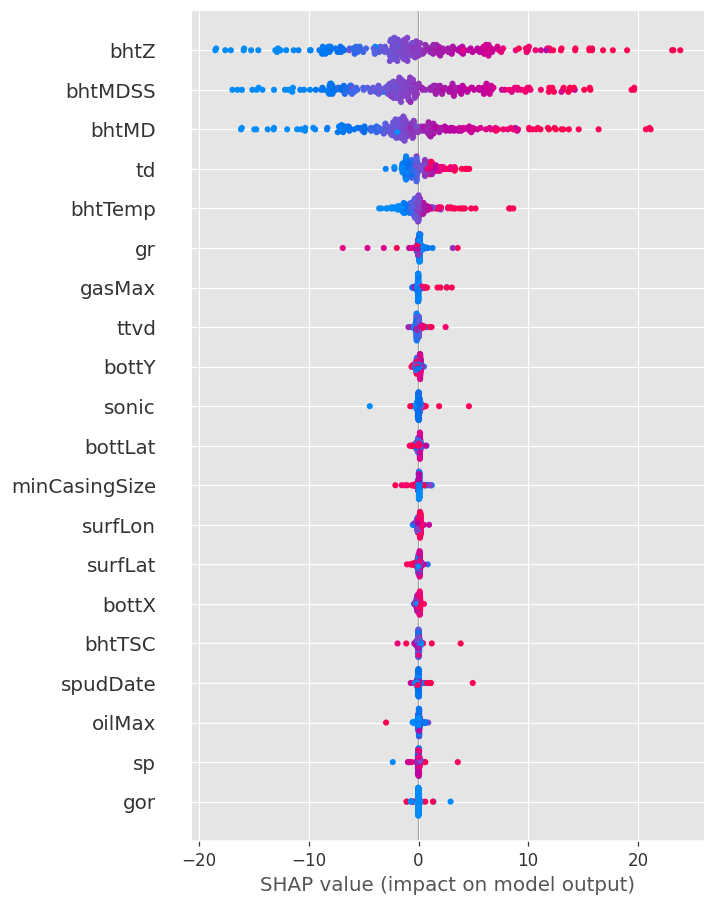

In [ ]:
f = plt.figure()
shap.summary_plot(shap_values, X_train, color_bar=False, plot_size=(6, 10))

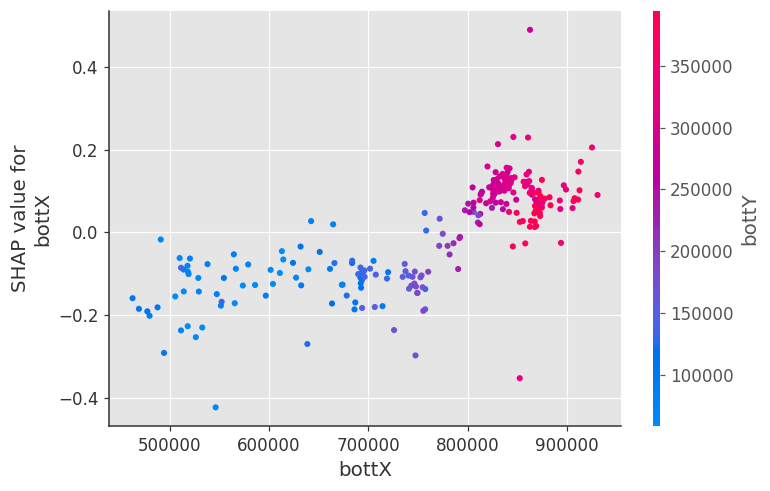

In [ ]:
shap.dependence_plot('bottX', shap_values, X_train)

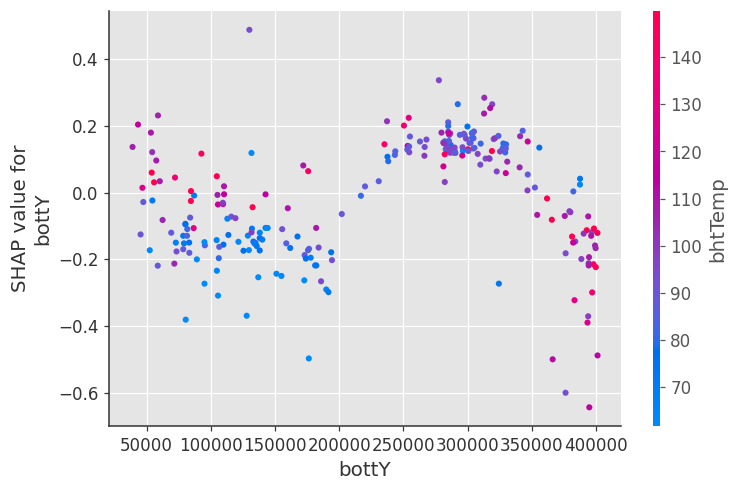

In [ ]:
shap.dependence_plot('bottY', shap_values, X_train)

In [ ]:
shap.initjs()
exp_values = shap.KernelExplainer(model.predict, shap.sample(X_train, 100)).expected_value
shap.force_plot(exp_values, shap_values, X_train)

#### Feature Ranking

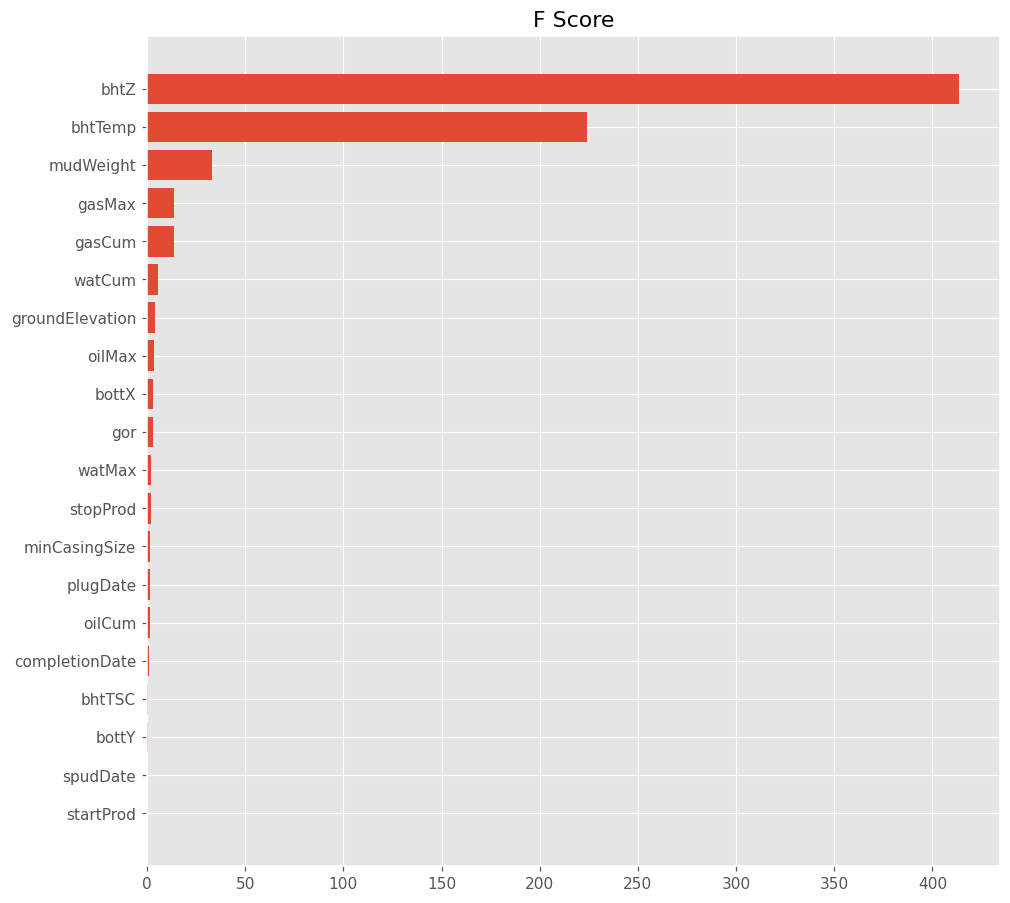

In [ ]:
fScore = SelectKBest(f_regression, k='all')
fScore.fit(X_train, y_train.values.ravel())
fdf = pd.DataFrame(zip(X_train.columns, fScore.scores_),
                   columns=['features', 'fScore']).sort_values('fScore', ascending=True)
plt.figure(figsize=(10, 10))
plt.barh(fdf.features, fdf.fScore)
plt.title('F Score')
plt.show()

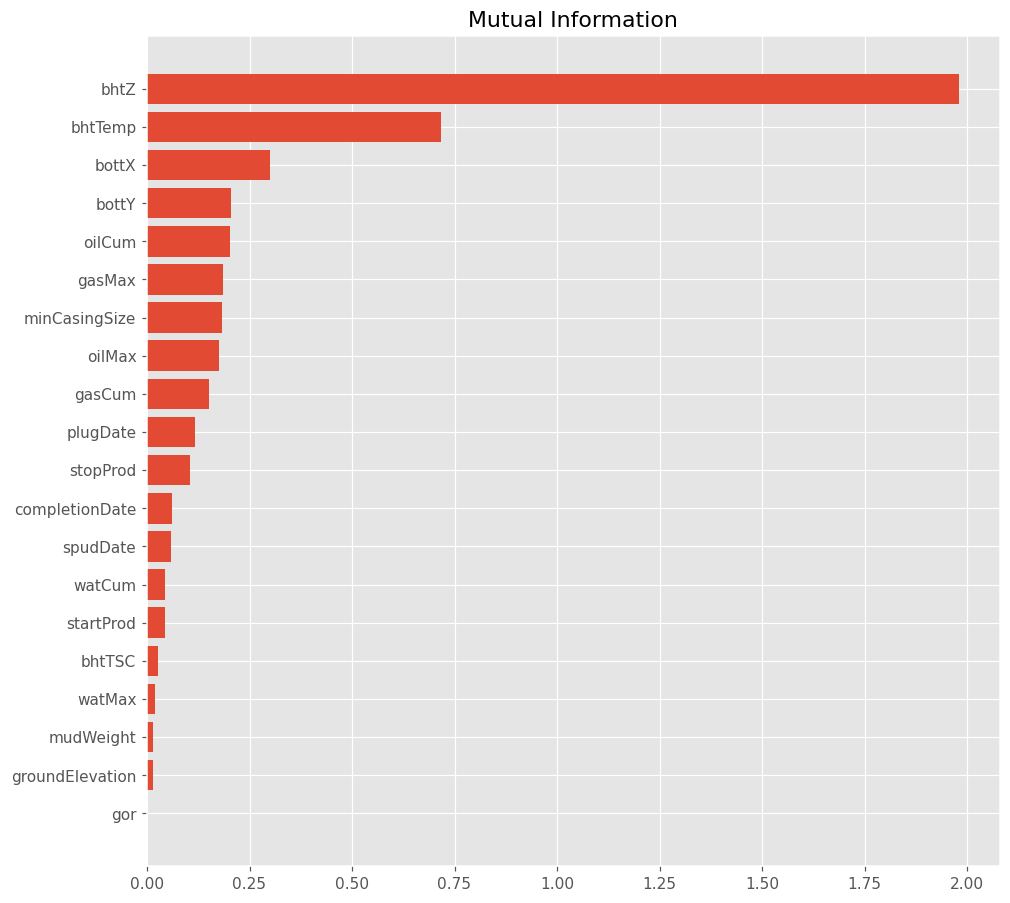

In [ ]:
miScore = SelectKBest(mutual_info_regression, k='all')
miScore.fit(X_train, y_train.values.ravel())
midf = pd.DataFrame(zip(X_train.columns, miScore.scores_),
                    columns=['features', 'miScore']).sort_values('miScore', ascending=True)
plt.figure(figsize=(10, 10))
plt.barh(midf.features, midf.miScore)
plt.title('Mutual Information')
plt.show()

## Mapping

In [ ]:
!pip install plotly --upgrade

In [ ]:
import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
allData = pd.concat([dvnData[['UWI', 'target', 'bhtMD', 'bottLat', 'bottLon']], 
                         egbData[['UWI', 'target', 'bhtMD', 'bottLat', 'bottLon']]], axis=0)
allData = allData.dropna()
allData

UWI      target        bhtMD    bottLat     bottLon
0    100010107020W500   60.970000  1417.000000  55.027981 -116.903553
1    100010608109W500   63.980000  1690.000000  55.987511 -115.390554
2    100011206021W400   39.070000   823.500000  54.167402 -113.002616
3    100011506915W500   69.470000  1809.500000  54.969037 -116.188158
4    100011804403W500   75.230000  2012.500000  52.787328 -114.415621
..                ...         ...          ...        ...         ...
315    42493318190000   96.105556  2102.571360  29.078411  -98.110357
316    42493319370000  100.472222  2231.136000  29.032057  -98.174977
318    42507007550000   78.161111  1524.609600  28.774926  -99.562065
320    42507312960000   94.794444  2179.624800  29.077015 -100.006558
321    42507326870000   78.888889  1223.144112  29.001905  -99.586898

[615 rows x 5 columns]

In [ ]:
px.set_mapbox_access_token('pk.eyJ1IjoiZnJ6enkiLCJhIjoiY2twbHl3ZDVlMWM4ZDJubHJjbmEzM3k2byJ9.xaJlU6fHwCRhoVbyJHH_lw')

fig = ff.create_hexbin_mapbox(
    data_frame=allData, lat="bottLat", lon="bottLon",
    nx_hexagon=60, opacity=1, mapbox_style='dark', 
    color='target', labels = {'color': 'True Temp (C)'}, 
    agg_func=np.mean, 
    # show_original_data=True,
    # original_data_marker=dict(size=3, opacity=0.6, color='white')
)
fig.update_layout(margin=dict(b=0, t=0, l=0, r=0))
# fig.update(layout_coloraxis_colorbar_x=0.9)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig.write_html('trainTemp.html')